<a href="https://colab.research.google.com/github/StevenFromUnimiMIEDSE/Coding_Tests/blob/main/20240616_embedding_test(1d_and_2d_closeness_check_on_words).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here's the code to randomly sample 1000 English words, convert them to embeddings using a pre-trained model, transform the embeddings into single numbers, and then display a histogram of those numbers. You can run this code in a Google Colab notebook.

In [ ]:
# First, install the necessary libraries
!pip install nltk
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

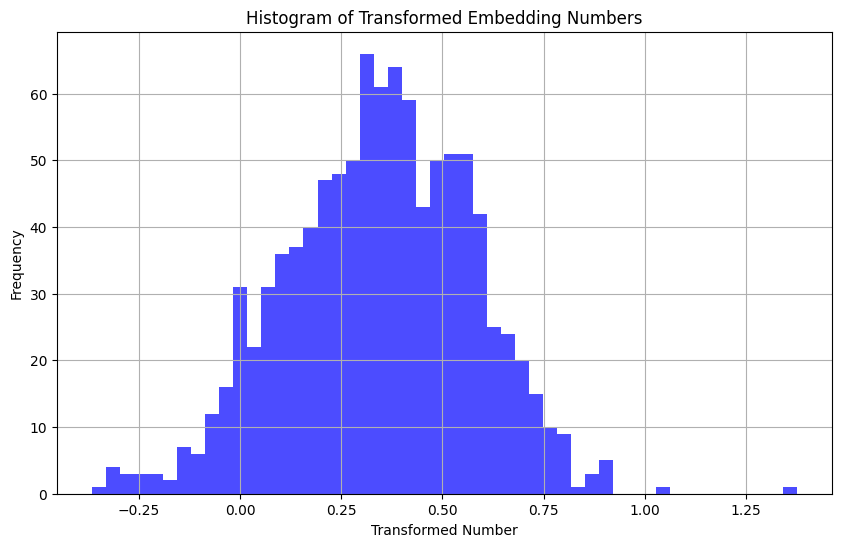

In [1]:


# Import required libraries
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import words
from sentence_transformers import SentenceTransformer

# Download the words corpus if not already downloaded
nltk.download('words')

# Randomly sample 1000 English words
english_words = words.words()
sampled_words = np.random.choice(english_words, 1000, replace=False)

# Load a pre-trained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the sampled words
embeddings = model.encode(sampled_words)

# Transform the embeddings to single numbers by multiplying with a simple I vector
# This is essentially summing up all the components of each embedding
transformed_numbers = np.sum(embeddings, axis=1)

# Plot the histogram of the transformed numbers
plt.figure(figsize=(10, 6))
plt.hist(transformed_numbers, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Transformed Embedding Numbers')
plt.xlabel('Transformed Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


10 Pairs of Words Closest in Transformed Numbers:
microdistillation - imponderable: 2.9802322387695312e-08
neuritis - phrontistery: 2.9802322387695312e-08
scowler - halogenate: 2.682209014892578e-07
knotwork - expoundable: 6.854534149169922e-07
overchant - pipewood: 3.0100345611572266e-06
unthroned - emplacement: 4.4405460357666016e-06
microbeless - reetam: 4.708766937255859e-06
fadeless - unsquashed: 5.0961971282958984e-06
attendantly - symplectic: 5.4836273193359375e-06
seagoing - sultanic: 6.616115570068359e-06


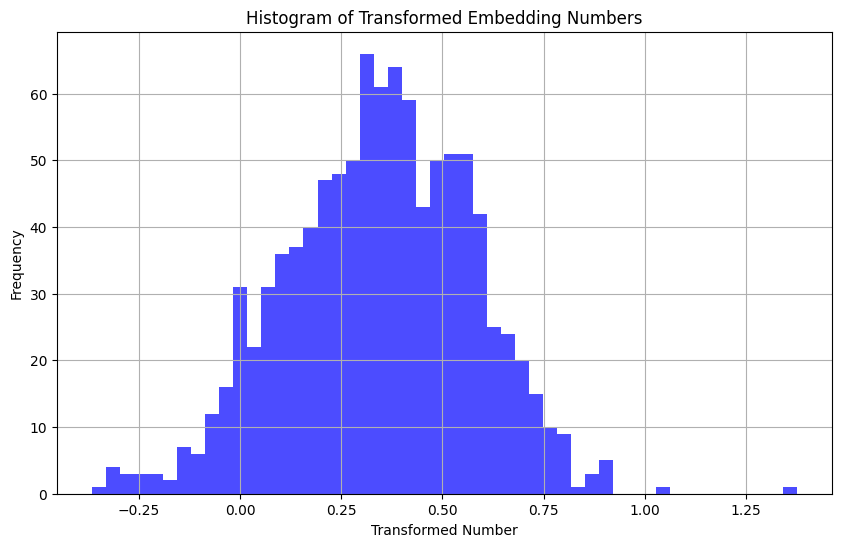

In [3]:
# Find 10 pairs of words that are closest in transformed numbers
closest_pairs = []
for i in range(len(transformed_numbers)):
    for j in range(i+1, len(transformed_numbers)):
        distance = abs(transformed_numbers[i] - transformed_numbers[j])
        closest_pairs.append((distance, sampled_words[i], sampled_words[j]))

# Sort pairs by distance and print the 10 closest pairs
closest_pairs = sorted(closest_pairs)[:10]
print("10 Pairs of Words Closest in Transformed Numbers:")
for dist, word1, word2 in closest_pairs:
    print(f"{word1} - {word2}: {dist}")

# Plot the histogram of the transformed numbers
plt.figure(figsize=(10, 6))
plt.hist(transformed_numbers, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Transformed Embedding Numbers')
plt.xlabel('Transformed Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Here's the code to condense the embeddings of the words to two dimensions using PCA and then display the result in a scatter plot.

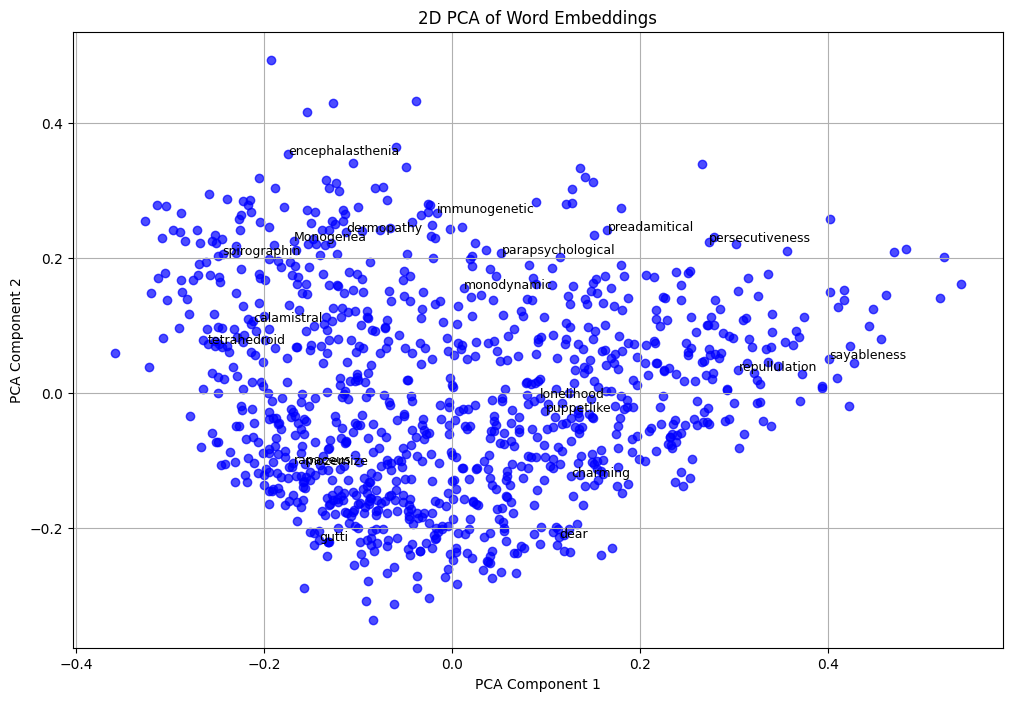

In [2]:
# Import required libraries for PCA
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensions of the embeddings to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7, color='blue')

# Annotate a few points with their corresponding words for clarity
for i in range(0, 1000, 50):  # Adjust the step for fewer/more annotations
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], sampled_words[i], fontsize=9)

plt.title('2D PCA of Word Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


10 Pairs of Words Closest in 2D PCA Space:
namely - remittently: 0.00011537176760612056
Chuje - zinsang: 0.00021807484154123813
freemasonic - sempiternize: 0.0004065801331307739
aniseikonic - diaeresis: 0.0006682651001028717
bomber - Arline: 0.0006838344852440059
halogenate - bloodnoun: 0.0008932673372328281
uncompleteness - irruptively: 0.0009025533217936754
Welf - ferly: 0.0009647650877013803
massive - consign: 0.0014364512171596289
format - fervent: 0.0015245155664160848


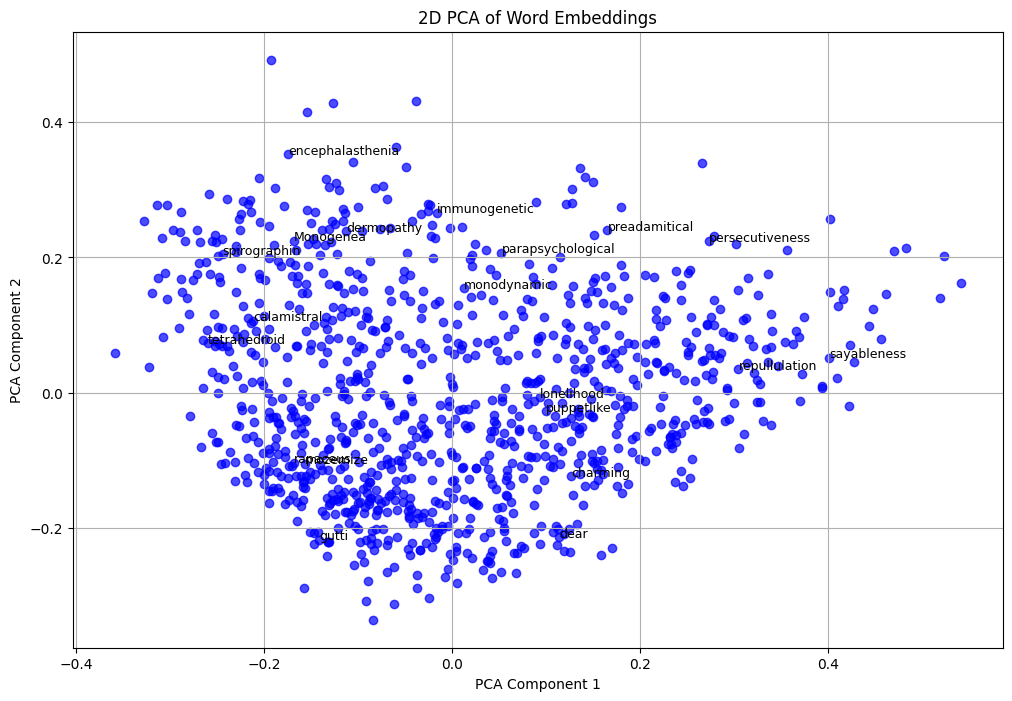

In [6]:
# Import required libraries for PCA
from sklearn.decomposition import PCA
from scipy.spatial import distance

# Perform PCA to reduce the dimensions of the embeddings to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Find 10 pairs of words that are closest in 2D space
closest_pairs_2d = []
for i in range(len(reduced_embeddings)):
    for j in range(i+1, len(reduced_embeddings)):
        dist_2d = distance.euclidean(reduced_embeddings[i], reduced_embeddings[j])
        closest_pairs_2d.append((dist_2d, sampled_words[i], sampled_words[j]))

# Sort pairs by distance and print the 10 closest pairs
closest_pairs_2d = sorted(closest_pairs_2d)[:10]
print("10 Pairs of Words Closest in 2D PCA Space:")
for dist, word1, word2 in closest_pairs_2d:
    print(f"{word1} - {word2}: {dist}")

# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7, color='blue')

# Annotate a few points with their corresponding words for clarity
for i in range(0, 1000, 50):  # Adjust the step for fewer/more annotations
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], sampled_words[i], fontsize=9)

plt.title('2D PCA of Word Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


merge the codes and try another embedding model

In [ ]:
# First, install the necessary libraries
!pip install nltk
!pip install sentence-transformers

ERROR: Operation cancelled by user
ERROR: Operation cancelled by user


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

10 Pairs of Words Closest in Transformed Numbers:
Carcharhinus - insulating: 3.814697265625e-06
affluently - quadrum: 1.049041748046875e-05
impertinency - confider: 1.1444091796875e-05
surrender - rightward: 1.33514404296875e-05
exospore - Calliopsis: 1.621246337890625e-05
unrepiningly - fimbria: 1.9073486328125e-05
fugal - patchouli: 2.6702880859375e-05
nameability - rampire: 2.86102294921875e-05
bespray - slabber: 3.147125244140625e-05
undispensed - subbituminous: 3.528594970703125e-05


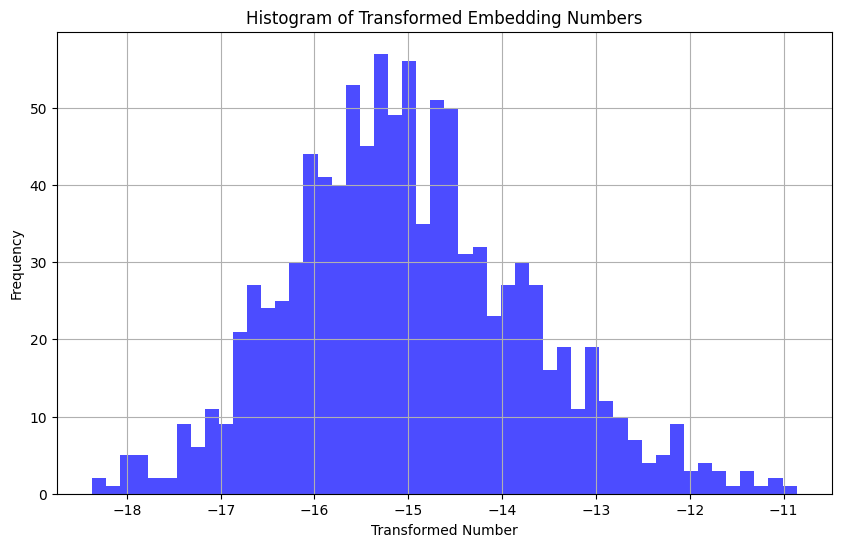

10 Pairs of Words Closest in 2D PCA Space:
Kitamat - centrifugalization: 0.007334471680223942
cofferfish - cyanimide: 0.0073587652295827866
colorature - pageanted: 0.007606185972690582
moloid - raciness: 0.010815486311912537
micropolariscope - holectypoid: 0.011110974475741386
nubiform - tompiper: 0.011601254343986511
restrictionist - virtualist: 0.014546544291079044
turbines - plugman: 0.016110802069306374
radiation - parilla: 0.017369817942380905
Erysibe - Bakuninist: 0.017524274066090584


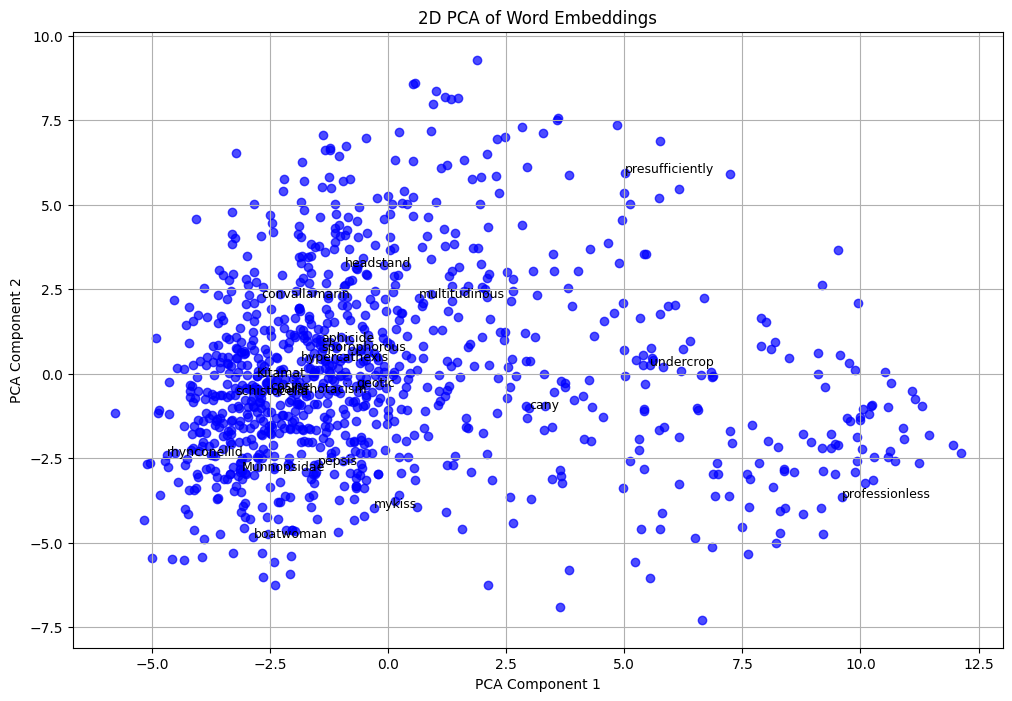

In [7]:

# Import required libraries
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import words
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from scipy.spatial import distance

# Download the words corpus if not already downloaded
nltk.download('words')

# Randomly sample 1000 English words
english_words = words.words()
sampled_words = np.random.choice(english_words, 1000, replace=False)

# Load a pre-trained embedding model
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Generate embeddings for the sampled words
embeddings = model.encode(sampled_words)

# Transform the embeddings to single numbers by summing up all the components of each embedding
transformed_numbers = np.sum(embeddings, axis=1)

# Find 10 pairs of words that are closest in transformed numbers
closest_pairs = []
for i in range(len(transformed_numbers)):
    for j in range(i+1, len(transformed_numbers)):
        distance_val = abs(transformed_numbers[i] - transformed_numbers[j])
        closest_pairs.append((distance_val, sampled_words[i], sampled_words[j]))

# Sort pairs by distance and print the 10 closest pairs
closest_pairs = sorted(closest_pairs)[:10]
print("10 Pairs of Words Closest in Transformed Numbers:")
for dist, word1, word2 in closest_pairs:
    print(f"{word1} - {word2}: {dist}")

# Plot the histogram of the transformed numbers
plt.figure(figsize=(10, 6))
plt.hist(transformed_numbers, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Transformed Embedding Numbers')
plt.xlabel('Transformed Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Perform PCA to reduce the dimensions of the embeddings to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Find 10 pairs of words that are closest in 2D space
closest_pairs_2d = []
for i in range(len(reduced_embeddings)):
    for j in range(i+1, len(reduced_embeddings)):
        dist_2d = distance.euclidean(reduced_embeddings[i], reduced_embeddings[j])
        closest_pairs_2d.append((dist_2d, sampled_words[i], sampled_words[j]))

# Sort pairs by distance and print the 10 closest pairs
closest_pairs_2d = sorted(closest_pairs_2d)[:10]
print("10 Pairs of Words Closest in 2D PCA Space:")
for dist, word1, word2 in closest_pairs_2d:
    print(f"{word1} - {word2}: {dist}")

# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7, color='blue')

# Annotate a few points with their corresponding words for clarity
for i in range(0, 1000, 50):  # Adjust the step for fewer/more annotations
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], sampled_words[i], fontsize=9)

plt.title('2D PCA of Word Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
